<a href="https://colab.research.google.com/github/Zineb-tech/ML-Research-Playground/blob/main/Predict_Restaurant_Profits_Based_on_City_Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Find the cities where business is set to boom, based on population size**

In [26]:
import numpy as np
import matplotlib.pyplot as plt



In [6]:
def load_data():
  data= np.loadtxt("data1.txt", delimiter=',')
  X=data[:,0]
  Y=data[:,1]
  return X,Y

x_train is the population of a city.

y_train is the profit of a restaurant in that city. A negative value for profit indicates a loss.


In [7]:
x_train , y_train = load_data();


 Print out each variable and see what it contains

In [17]:
print('Type of x_train',type(x_train))
print('First five elements of x_train are',x_train[:5])

<class 'numpy.ndarray'>
[6.1101 5.5277 8.5186 7.0032 5.8598]


In [18]:
print('Type of y_train',type(y_train))
print('First five elements of y_train are',y_train[:5])

Type of y_train <class 'numpy.ndarray'>
First five elements of y_train are [17.592   9.1302 13.662  11.854   6.8233]


Checking the shape of variables


In [25]:
print ('The shape of x_train',x_train.shape)
print ('The shape of y_train',y_train.shape)
print('number of training examples is', len(x_train))

The shape of x_train (97,)
The shape of y_train (97,)
number of training examples is 97


The dataset is clean with no missing values.

 Let’s go ahead and plot (scatter plot)  data to get visualization.


Text(0, 0.5, 'Profit in 10 000$')

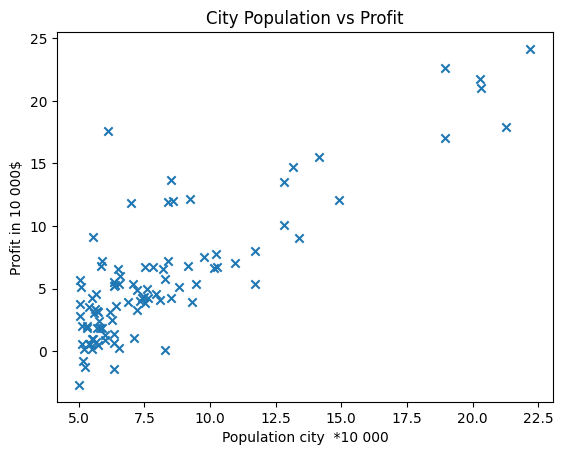

In [94]:
plt.scatter(x_train,y_train,marker='x')
plt.title('City Population vs Profit')
plt.xlabel('Population city  *10 000')
plt.ylabel('Profit in 10 000$')

Implement linear regression, where the goal is to model the relationship between  input data (city population) and output data (profit).

**Mathematical modeling :**

f(x)= wx+b

f(x) is the predicted value

x is the input

w the weight that controls how much the output y change when x change

b the bias (output value when x=0)


**Compute cost**

Cost Function (Mean Squared Error): It measures how far off our predictions are from the actual values.



In [73]:
def compute_cost(x,y,w,b):
  m=len(x)
  cost_sum=0
  for i in range(m):
    fx= w * x[i] + b
    jw_b=(fx-y[i])**2
    cost_sum+=jw_b

  total_cost= (1/(2*m))*cost_sum
  return total_cost



In [54]:
# Example usage with initial values for w and b
initial_w = 2
initial_b = 1
compute_cost(x_train,y_train,initial_w,initial_b)

np.float64(75.20338497891959)

Use gradiant decent to find optimal values of w and b that will achieve lower cost function

In [74]:
def compute_gradient(x,y,w,b):
  m=len(x)
  dw = 0
  db = 0
  for i in range(m):
    fx= w * x[i] + b
    partial_db=fx-y[i]
    partial_dw=(fx-y[i])*x[i]

    dw+=partial_dw
    db+=partial_db
  dw*=1/m
  db*=1/m
  return dw,db




In [63]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

compute_gradient(x_train, y_train, initial_w, initial_b)


(np.float64(-65.32884974555672), np.float64(-5.83913505154639))

In [65]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
compute_gradient(x_train, y_train, test_w, test_b)



(np.float64(-47.41610118114434), np.float64(-4.007175051546391))

In [68]:
def gradient_descent(x,y,w,b,cost_function,gradient_function,alpha,nbIteration):
  for i in range(nbIteration):
    dw,db=gradient_function(x,y,w,b)

    w=w-alpha*dw
    b=b-alpha*db

    cost=cost_function(x,y,w,b)

  return w,b,cost



In [79]:
initial_w = 0
initial_b = 0
nbIteration = 1500
alpha= 0.01
w,b,cost=gradient_descent(x_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,nbIteration)
print("w,b found by gradient descent :", w,b)
print(cost)

w,b found by gradient descent : 1.166362350335582 -3.63029143940436
4.483388256587725


In [87]:
m=len(x_train)
predicted=np.zeros(m)
for i in range(m):
  predicted[i]=w*x_train[i]+b

Text(0, 0.5, 'Profit in 10 000$')

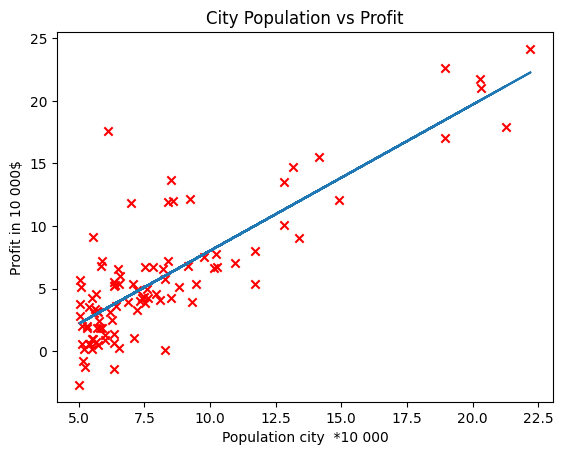

In [92]:
plt.plot(x_train,predicted)
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('City Population vs Profit')
plt.xlabel('Population city  *10 000')
plt.ylabel('Profit in 10 000$')


 Let's predict what the profit would be in areas of 35,000 and 70,000 people.

In [97]:
predict1=3.5*w+b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2=7.0*w+b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))


For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
